# Crime Detection Model

## Import Datasets

In [25]:
import pandas as pd
import numpy as np

In [26]:
crime_dataset1 = pd.read_csv('../datasets/crime_datasets/2015-crime-boston.csv')
crime_dataset2 = pd.read_csv('../datasets/crime_datasets/2016-crime-boston.csv')
crime_dataset3 = pd.read_csv('../datasets/crime_datasets/2017-crime-boston.csv')
crime_dataset4 = pd.read_csv('../datasets/crime_datasets/2018-crime-boston.csv')
crime_dataset5 = pd.read_csv('../datasets/crime_datasets/2019-crime-boston.csv')
crime_dataset6 = pd.read_csv('../datasets/crime_datasets/2020-crime-boston.csv')
crime_dataset7 = pd.read_csv('../datasets/crime_datasets/2021-crime-boston.csv')
crime_dataset8 = pd.read_csv('../datasets/crime_datasets/2022-crime-boston.csv')
crime_dataset9 = pd.read_csv('../datasets/crime_datasets/2023-present-crime-boston.csv')

/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/188881985.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset5 = pd.read_csv('../datasets/crime_datasets/2019-crime-boston.csv')
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/188881985.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset6 = pd.read_csv('../datasets/crime_datasets/2020-crime-boston.csv')
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/188881985.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset7 = pd.read_csv('../datasets/crime_datasets/2021-crime-boston.csv')
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/188881985.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_dataset8 = pd.read_

## Pre-processing 1

In [27]:
for i in range(1,10):
    print(f"Dataset {i} shape: ", eval(f"crime_dataset{i}.shape"))

print(f"Total rows in all datasets: {sum([eval(f'crime_dataset{i}.shape[0]') for i in range(1,10)])}")

Dataset 1 shape:  (53597, 17)
Dataset 2 shape:  (99430, 17)
Dataset 3 shape:  (101338, 17)
Dataset 4 shape:  (98888, 17)
Dataset 5 shape:  (87184, 17)
Dataset 6 shape:  (70894, 17)
Dataset 7 shape:  (71721, 17)
Dataset 8 shape:  (73852, 17)
Dataset 9 shape:  (218897, 17)
Total rows in all datasets: 875801


In [28]:
combined_crime_data = pd.concat([eval(f"crime_dataset{i}") for i in range(1,10)], ignore_index=True)
print("Combined dataset shape: ", combined_crime_data.shape)

Combined dataset shape:  (875801, 17)


In [29]:
combined_crime_data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,BERNARD,NaN,NaN,NaN
2,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
3,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
4,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"
5,I152049897,3201,Property Lost,PROPERTY - LOST,B2,282,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.328663,-71.085634,"(42.32866284, -71.08563401)"
6,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)"
7,I152051083,3130,Search Warrants,SEARCH WARRANT,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
8,I152067251,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,93,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,FANEUIL HALL SQ,42.360205,-71.056208,"(42.36020464, -71.05620816)"
9,I152049588,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155,NaN,2015-06-15 00:01:00,2015,6,Monday,0,Part One,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)"


In [30]:
combined_crime_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [31]:
predict_offense_df = combined_crime_data[['OFFENSE_CODE_GROUP', 'DISTRICT', 'STREET', 'UCR_PART', 'OCCURRED_ON_DATE']]
predict_offense_time_df = combined_crime_data[['HOUR', 'DISTRICT', 'STREET', 'OCCURRED_ON_DATE']]

In [32]:
predict_offense_df.head()

,OFFENSE_CODE_GROUP,DISTRICT,STREET,UCR_PART,OCCURRED_ON_DATE
0,Harassment,C11,MELBOURNE ST,Part Two,2015-06-15 00:00:00
1,Property Lost,NaN,BERNARD,Part Three,2015-06-15 00:00:00
2,Property Lost,B3,NORFOLK ST,Part Three,2015-06-15 00:00:00
3,Investigate Person,A7,PARIS ST,Part Three,2015-06-15 00:00:00
4,Other,C11,WASHINGTON ST,Part Two,2015-06-15 00:00:00


In [33]:
predict_offense_time_df.head()

,HOUR,DISTRICT,STREET,OCCURRED_ON_DATE
0,0,C11,MELBOURNE ST,2015-06-15 00:00:00
1,0,NaN,BERNARD,2015-06-15 00:00:00
2,0,B3,NORFOLK ST,2015-06-15 00:00:00
3,0,A7,PARIS ST,2015-06-15 00:00:00
4,0,C11,WASHINGTON ST,2015-06-15 00:00:00


In [34]:
print(predict_offense_df.isnull().sum())
print(predict_offense_time_df.isnull().sum())

OFFENSE_CODE_GROUP    522548
DISTRICT                4748
STREET                 11888
UCR_PART              522645
OCCURRED_ON_DATE           0
dtype: int64
HOUR                    0
DISTRICT             4748
STREET              11888
OCCURRED_ON_DATE        0
dtype: int64


In [35]:
combined_crime_data[combined_crime_data['UCR_PART'] == 'Part One'].head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
9,I152049588,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155,NaN,2015-06-15 00:01:00,2015,6,Monday,0,Part One,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)"
24,I152049486,619,Larceny,LARCENY ALL OTHERS,C6,914,NaN,2015-06-15 02:00:00,2015,6,Monday,2,Part One,GENERAL LAWRENCE J LOGAN,42.327204,-71.053189,"(42.32720403, -71.05318949)"
25,I152049483,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D14,782,NaN,2015-06-15 02:00:00,2015,6,Monday,2,Part One,CAMBRIDGE ST,42.352593,-71.140284,"(42.35259348, -71.14028431)"
27,I152049607,617,Larceny,LARCENY THEFT FROM BUILDING,A1,115,NaN,2015-06-15 02:12:00,2015,6,Monday,2,Part One,LINCOLN ST,42.352018,-71.058116,"(42.35201794, -71.05811581)"
28,I152049485,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,444,NaN,2015-06-15 02:45:00,2015,6,Monday,2,Part One,ESMOND ST,42.298620,-71.085110,"(42.29861988, -71.08511004)"
32,I152049592,724,Auto Theft,AUTO THEFT,C11,345,NaN,2015-06-15 03:00:00,2015,6,Monday,3,Part One,MONTELLO ST,42.302422,-71.061229,"(42.30242197, -71.06122871)"
34,I152049662,619,Larceny,LARCENY ALL OTHERS,C6,191,NaN,2015-06-15 04:48:00,2015,6,Monday,4,Part One,DORCHESTER AVE,42.329038,-71.056945,"(42.32903760, -71.05694505)"
45,I152049502,423,Aggravated Assault,ASSAULT - AGGRAVATED,B3,472,NaN,2015-06-15 07:45:00,2015,6,Monday,7,Part One,WOODHAVEN ST,42.271055,-71.097539,"(42.27105479, -71.09753898)"
47,I152053893,619,Larceny,LARCENY ALL OTHERS,D4,172,NaN,2015-06-15 08:00:00,2015,6,Monday,8,Part One,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
48,I152052877,724,Auto Theft,AUTO THEFT,B3,439,NaN,2015-06-15 08:00:00,2015,6,Monday,8,Part One,STRATTON ST,42.289285,-71.086678,"(42.28928493, -71.08667781)"


In [36]:
combined_crime_data[combined_crime_data['OFFENSE_CODE_GROUP'].isnull()].head(20)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
353253,192017144,3201,NaN,PROPERTY - LOST,D4,167,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,HARRISON AVE,42.334961,-71.075126,"(42.33496089, -71.07512604)"
353254,192001553,3201,NaN,PROPERTY - LOST,D4,128,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,STANHOPE ST,42.348689,-71.072580,"(42.34868906, -71.07257996)"
353255,192000804,2629,NaN,HARASSMENT,B3,417,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,MORA ST,42.282082,-71.073649,"(42.28208187, -71.07364878)"
353256,192065160,619,NaN,LARCENY ALL OTHERS,NaN,,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,BSTN MA,NaN,NaN,NaN
353257,192007583,2647,NaN,THREATS TO DO BODILY HARM,C11,393,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,FLORIDA ST,42.287877,-71.058397,"(42.28787659, -71.05839667)"
353258,192042989,3201,NaN,PROPERTY - LOST,D4,,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,HARRISON AVE,42.334961,-71.075126,"(42.33496089, -71.07512604)"
353259,192020384,3205,NaN,M/V PLATES - LOST,B2,330,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,COLUMBIA RD,42.305247,-71.080894,"(42.30524741, -71.08089422)"
353260,192033744,2629,NaN,HARASSMENT,A1,77,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,NEW SUDBURY ST,42.361838,-71.059765,"(42.36183845, -71.05976493)"
353261,192014219,3201,NaN,PROPERTY - LOST,D4,165,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,HARRISON AVE,42.343025,-71.064940,"(42.34302515, -71.0649397)"
353262,192024554,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B2,266,0,2019-01-01 00:00:00,2019,1,Tuesday,0,NaN,WINTHROP ST,42.325062,-71.078951,"(42.32506211, -71.07895083)"


### (Since we cannot decide what UCR_PART and OFFENSE_CODE_GROUP values to give to the null values, we will have to delete the null rows)

In [37]:
predict_offense_df = predict_offense_df.dropna()
predict_offense_time_df = predict_offense_time_df.dropna()

In [38]:
print(predict_offense_df.shape)
print(predict_offense_time_df.shape)

(341156, 5)
(860240, 4)


In [39]:
predict_offense_df["STREET"].value_counts()

STREET
WASHINGTON ST     15808
BLUE HILL AVE      8638
BOYLSTON ST        8041
DORCHESTER AVE     5684
TREMONT ST         5315
                  ...  
DUDLEY MBTA           1
ALNA PL               1
FORYSTH               1
SIXTH ST              1
ANCHOR ST             1
Name: count, Length: 4393, dtype: int64

In [40]:
predict_offense_df["DISTRICT"].value_counts()

DISTRICT
B2     54288
C11    46706
D4     43823
B3     39213
A1     37627
C6     24635
D14    21769
E13    18831
E18    18712
E5     14443
A7     14050
A15     7059
Name: count, dtype: int64

# NEW VIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

combined_crime_data = pd.concat([
    pd.read_csv('../datasets/crime_datasets/2015-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2016-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2017-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2018-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2019-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2020-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2021-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2022-crime-boston.csv'),
    pd.read_csv('../datasets/crime_datasets/2023-present-crime-boston.csv')
], ignore_index=True)

print("predict_offense_df shape:", predict_offense_df.shape)
print("predict_offense_time_df shape:", predict_offense_time_df.shape)

/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/1325941777.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('../datasets/crime_datasets/2019-crime-boston.csv'),
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/1325941777.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('../datasets/crime_datasets/2020-crime-boston.csv'),
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/1325941777.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('../datasets/crime_datasets/2021-crime-boston.csv'),
/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/1325941777.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('../datasets/crime_datasets/2022-crime-boston.csv'),


predict_offense_df shape: (341156, 5)
predict_offense_time_df shape: (860240, 4)


/var/folders/6c/9skhv5gd3dd6z1g2y4xnf3140000gn/T/ipykernel_64458/1325941777.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('../datasets/crime_datasets/2023-present-crime-boston.csv')


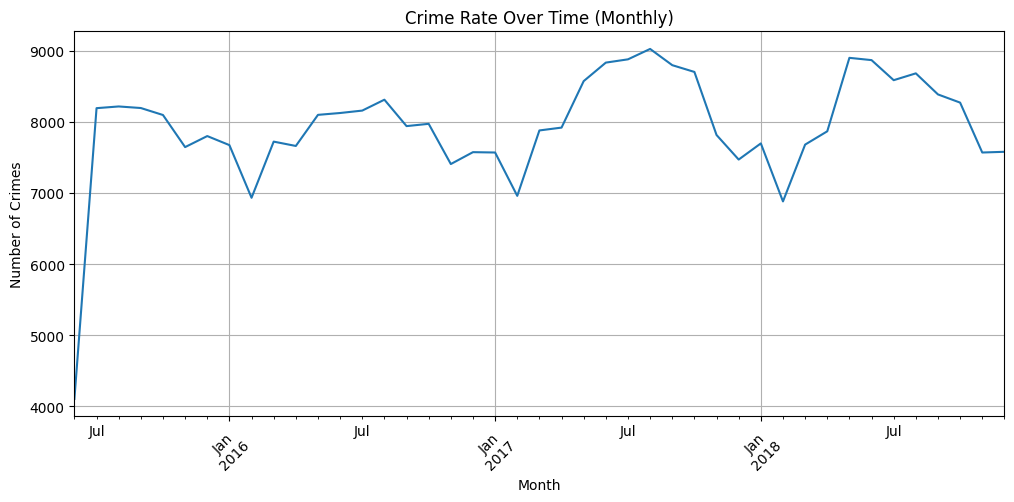

In [44]:
dates = pd.to_datetime(
    combined_crime_data.loc[predict_offense_df.index, "OCCURRED_ON_DATE"],
    errors="coerce"
)

ts = dates.groupby(dates.dt.to_period("M")).size()

plt.figure(figsize=(12,5))
ts.plot(kind="line")
plt.title("Crime Rate Over Time (Monthly)")
plt.grid()
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

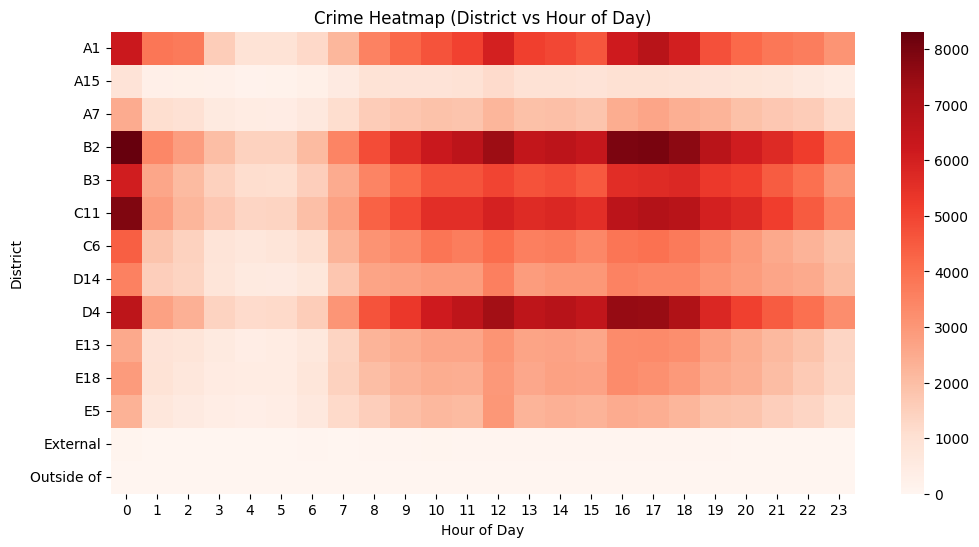

In [45]:
heat = predict_offense_time_df.pivot_table(
    index="DISTRICT", columns="HOUR", values="STREET", aggfunc="count", fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap="Reds")
plt.title("Crime Heatmap (District vs Hour of Day)")
plt.xlabel("Hour of Day")
plt.ylabel("District")
plt.show()

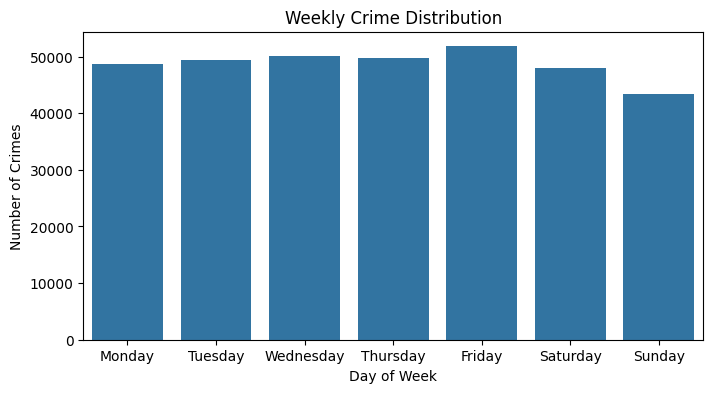

In [48]:
dates = pd.to_datetime(
    combined_crime_data.loc[predict_offense_df.index, "OCCURRED_ON_DATE"],
    errors="coerce"
)
dow = dates.dt.day_name()

plt.figure(figsize=(8,4))
sns.countplot(x=dow, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Weekly Crime Distribution")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()

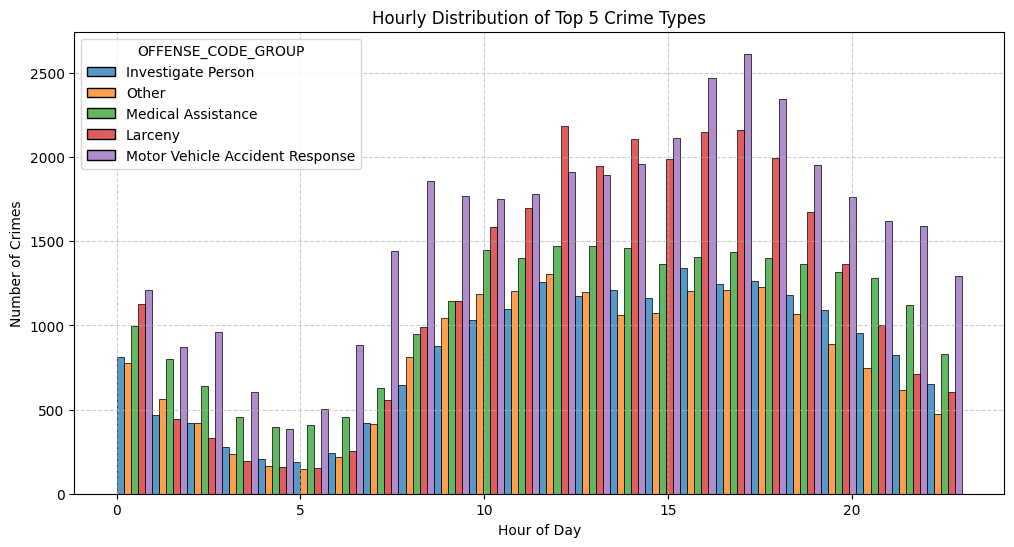

In [51]:
merged = predict_offense_time_df.join(predict_offense_df["OFFENSE_CODE_GROUP"])
top_types = merged["OFFENSE_CODE_GROUP"].value_counts().head(5).index
subset = merged[merged["OFFENSE_CODE_GROUP"].isin(top_types)]
plt.figure(figsize=(12,6))
sns.histplot(
    data=subset,
    x="HOUR",
    hue="OFFENSE_CODE_GROUP",
    multiple="dodge",
    bins=24
)
plt.title("Hourly Distribution of Top 5 Crime Types")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.show()

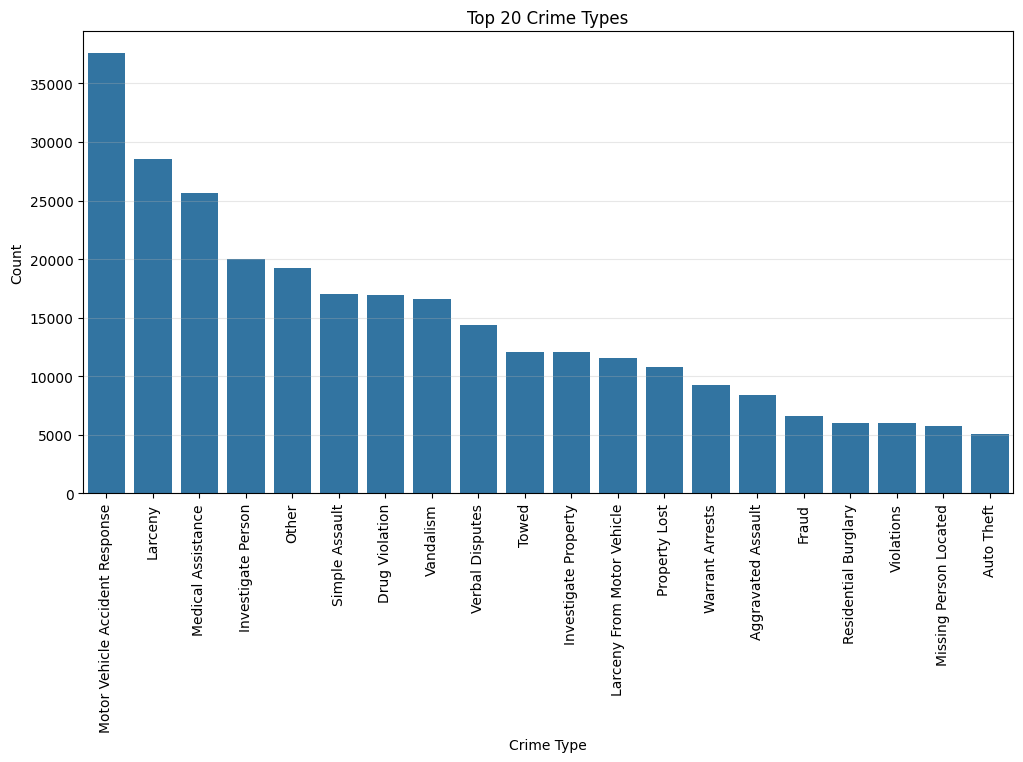

In [56]:
# Crime type frequencies
freqs = predict_offense_df["OFFENSE_CODE_GROUP"].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=freqs.index, y=freqs.values)
plt.xticks(rotation=90)
plt.title("Top 20 Crime Types")
plt.grid(axis="y", alpha=0.3)
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

# ======= (Visualization complete) =======

---

From the crime dataset visualization, we can understand our dataset more. We see that there is a sharp increase in crime count in the months of June and July, 2025. This could be a mistake from the dataset, therefore it safer to exclude that part from training. Next, there is a crime type labeled as "Other". "Other" includes a list of crime types which makes it useless to our model if an area's crime type will predict "Other" instead of a meaningful class. Hence, it is wiser to exclude all data points with crime type labeled "Other".

## Preprocess 2

In [57]:
predict_offense_df.value_counts(subset=['OFFENSE_CODE_GROUP'])

OFFENSE_CODE_GROUP             
Motor Vehicle Accident Response    37559
Larceny                            28529
Medical Assistance                 25654
Investigate Person                 20050
Other                              19277
                                   ...  
Explosives                            25
Manslaughter                           8
Gambling                               8
Burglary - No Property Taken           5
Biological Threat                      2
Name: count, Length: 63, dtype: int64

In [58]:
predict_offense_df[predict_offense_df['OFFENSE_CODE_GROUP'] != 'Other'].value_counts(subset=['OFFENSE_CODE_GROUP'])

OFFENSE_CODE_GROUP             
Motor Vehicle Accident Response    37559
Larceny                            28529
Medical Assistance                 25654
Investigate Person                 20050
Simple Assault                     17050
                                   ...  
Explosives                            25
Manslaughter                           8
Gambling                               8
Burglary - No Property Taken           5
Biological Threat                      2
Name: count, Length: 62, dtype: int64

In [59]:
predict_offense_df = predict_offense_df[predict_offense_df['OFFENSE_CODE_GROUP'] != 'Other']
predict_offense_df.shape

(321879, 5)

In [63]:
cutoff = pd.Timestamp("2015-07-01")
before_aug_2015 = predict_offense_df[
    pd.to_datetime(predict_offense_df["OCCURRED_ON_DATE"], errors="coerce") < cutoff
]

print("Rows before July 2015:", before_aug_2015.shape[0])
before_aug_2015.head(10)

Rows before July 2015: 3815


,OFFENSE_CODE_GROUP,DISTRICT,STREET,UCR_PART,OCCURRED_ON_DATE
0,Harassment,C11,MELBOURNE ST,Part Two,2015-06-15 00:00:00
2,Property Lost,B3,NORFOLK ST,Part Three,2015-06-15 00:00:00
3,Investigate Person,A7,PARIS ST,Part Three,2015-06-15 00:00:00
5,Property Lost,B2,WASHINGTON ST,Part Three,2015-06-15 00:00:00
6,Confidence Games,B3,HARLEM ST,Part Two,2015-06-15 00:00:00
7,Search Warrants,A7,PARIS ST,Part Three,2015-06-15 00:00:00
8,Fraud,A1,FANEUIL HALL SQ,Part Two,2015-06-15 00:00:00
9,Larceny From Motor Vehicle,D4,CONCORD SQ,Part One,2015-06-15 00:01:00
10,Drug Violation,C11,HANCOCK ST,Part Two,2015-06-15 00:01:00
11,Drug Violation,C11,HANCOCK ST,Part Two,2015-06-15 00:01:00


In [64]:
# filter out rows before July 2015
mask_pred = pd.to_datetime(predict_offense_df["OCCURRED_ON_DATE"], errors="coerce") >= cutoff
predict_offense_df = predict_offense_df.loc[mask_pred].reset_index(drop=True)

mask_time = pd.to_datetime(predict_offense_time_df["OCCURRED_ON_DATE"], errors="coerce") >= cutoff
predict_offense_time_df = predict_offense_time_df.loc[mask_time].reset_index(drop=True)

print("predict_offense_df:", predict_offense_df.shape,
    "predict_offense_time_df:", predict_offense_time_df.shape)

predict_offense_df: (318064, 5) predict_offense_time_df: (637675, 4)
